In [7]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [8]:
t0, tf = 0, 60
N = 1e6
beta, gamma = 0.8, 0.1 
S0, I0, R0 = N, 1, 0.0

In [9]:
def sir_system(t, compartments, gamma):
    S, I, R = compartments
    return [
        -(beta * S * I) / N,
        (beta * S * I) / N - gamma * I,
        gamma * I
    ]

In [14]:
sir_sol = solve_ivp(
    sir_system,
    [t0, tf],
    [S0, I0, R0],
    args=[gamma],
    dense_output=True
)

nop_data = 100
tt = np.linspace(t0, tf, nop_data)
sir_data = sir_sol.sol(tt).T

R0 = gamma / beta 

T = N / R0

In [15]:
T

8000000.0

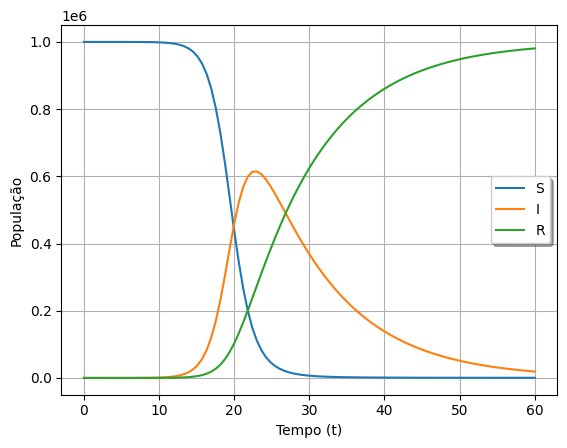

In [13]:
plt.plot(tt, sir_data)
# plt.axhline(T, color="red", linestyle="--")
plt.legend(["S", "I", "R"], shadow=True)
plt.xlabel("Tempo (t)")
plt.ylabel("População")
plt.grid()
plt.savefig(f"../images/sir-example-beta{beta}-gamma{gamma}.png")
plt.show()